**Chapter 1: Basic Matrix Operations**

In [ ]:
#If using Colab, you can only pull files from your Google Drive
#Run the following code to give Colab access
from google.colab import drive
drive.mount('/content/drive')

#File paths should then look like this:
file_path = '/content/drive/MyDrive/LinAlg/data/file.png'
#As opposed to your computer's directory, which might look like this:
file_path = '/Users/yourname/LinAlg/data/file.png'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, inv
import scipy.stats as stats
from scipy.linalg import svd
import pandas as pd
import statsmodels.api as sm
import string
from imageio import imread
from skimage.color import rgb2gray
from skimage import img_as_float
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Some basic examples with Python

3
-2


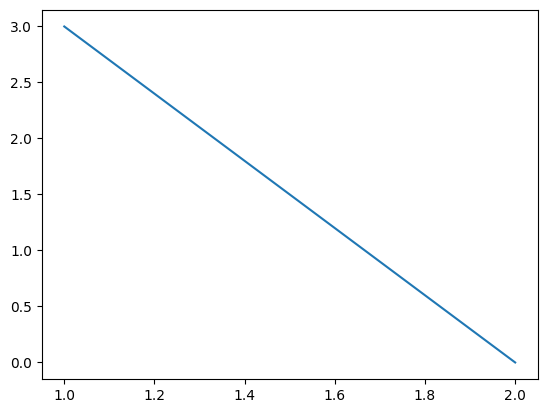

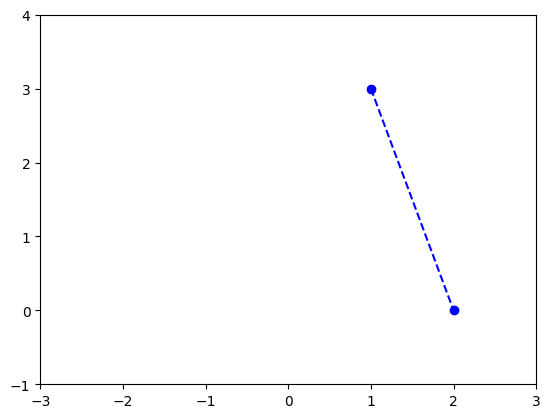

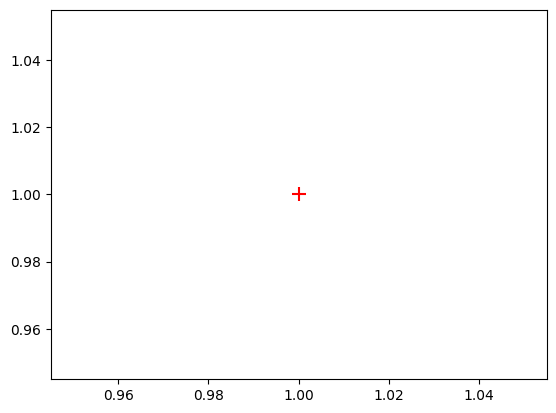

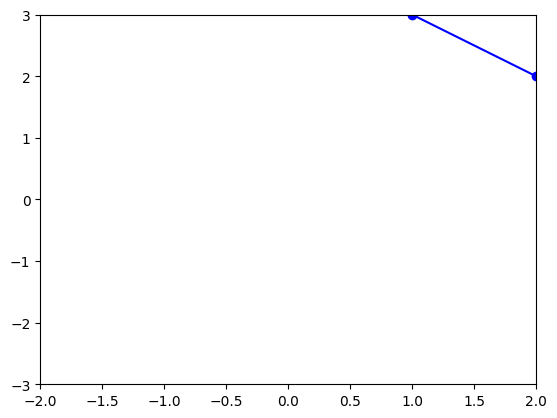

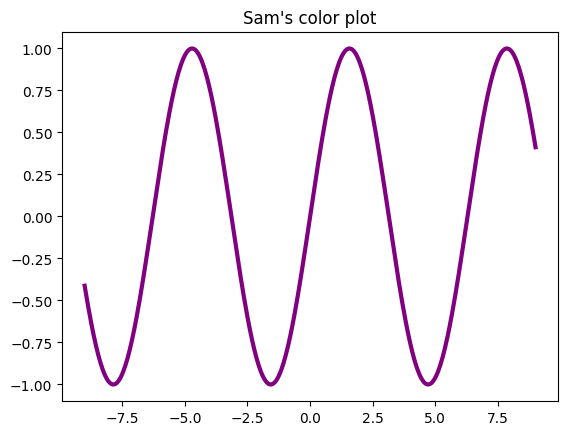

[[ 1  1]
 [ 1 -1]]
[[ 1  1]
 [ 1 -1]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1 3]
 [2 0]]


In [2]:
print(1 + 2)
print(1 - 3)

#Plot examples
x = np.array([1, 2])
y = np.array([3, 0])
plt.plot(x, y)
plt.show()

plt.plot(x, y, color='blue', marker='o', linestyle='dashed')
plt.xlim(-3, 3)
plt.ylim(-1, 4)
plt.show()

plt.scatter(1, 1, color='red', s=100, marker='+')
plt.show()

x = np.array([1, 2])
y = np.array([3, 2])
plt.plot(x, y, color='blue', marker='o')
plt.xlim(-2, 2)
plt.ylim(-3, 3)
plt.show()

t = np.linspace(-9, 9, 400)
plt.plot(t, np.sin(t), color='purple', linewidth=3)
plt.title("Sam's color plot")
plt.show()

#Some matrices
A = np.array([[1, 1], [1, -1]])
print(A)

A1 = np.array([[1, 1], [1, -1]])
print(A1)

A2 = np.ones((5, 4))
print(A2)

B = np.array([[1, 3], [2, 0]])
print(B)

Matrix/Vector Operations

In [3]:
#Matrix subtraction
A = np.array([[1, 0], [3, -1]])
B = np.array([[1, 3], [2, 4]])
print(A - B)

#Dot product
a = np.array([1, 1])
b = np.array([1, 0])
print(np.dot(a, b))
print(a @ b)  #Another way to compute dot product

#Calculate the angle between 2 vectors
#Euclidean norm/amplitude of a vector
am = norm(a, 2)
bm = norm(b, 2)
print(am)
print(bm)

#Angle (in degrees) between two vectors
angleab = np.arccos(np.dot(a, b) / (am * bm)) * 180 / np.pi
print(angleab)

#Cross product of two 3D vectors
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print(np.cross(x, y))
print(np.dot(x, y))

#Scalar times a matrix
print(3 * A)
print(b * A)

#Matrix multiplication
print(A @ B)
print(B @ A)

#Matrix transpose
C = np.array([[1, 2], [3, 4]])
print(C.T)

#Generate a diagonal matrix
D = np.diag([2, 1, -3])
print(D)

#Generate a 3-dimensional identity matrix
I = np.eye(3)
print(I)

#Generate a 2-by-3 zero matrix
M = np.zeros((2, 3))
print(M)

#Compute the inverse of a matrix
A = np.array([[1, 1], [1, -1]])
invA = inv(A)
print(invA)

#Verify the inverse
print(invA @ A)

[[ 0 -3]
 [ 1 -5]]
1
1
1.4142135623730951
1.0
45.00000000000001
[-3  6 -3]
32
[[ 3  0]
 [ 9 -3]]
[[1 0]
 [3 0]]
[[1 3]
 [1 5]]
[[10 -3]
 [14 -4]]
[[1 3]
 [2 4]]
[[ 2  0  0]
 [ 0  1  0]
 [ 0  0 -3]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[ 0.5  0.5]
 [ 0.5 -0.5]]
[[1. 0.]
 [0. 1.]]


Examples: 9/9/2024 class

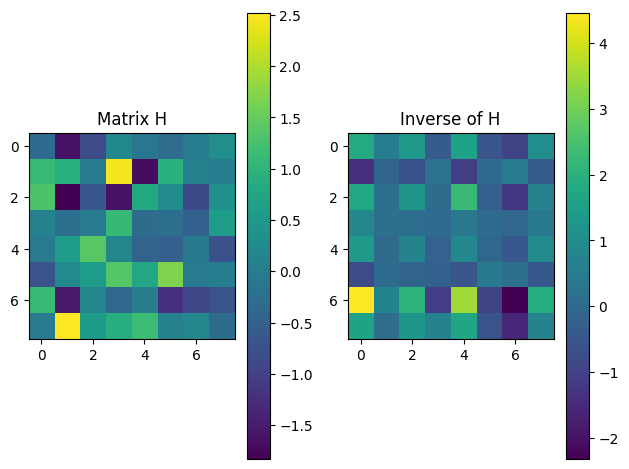

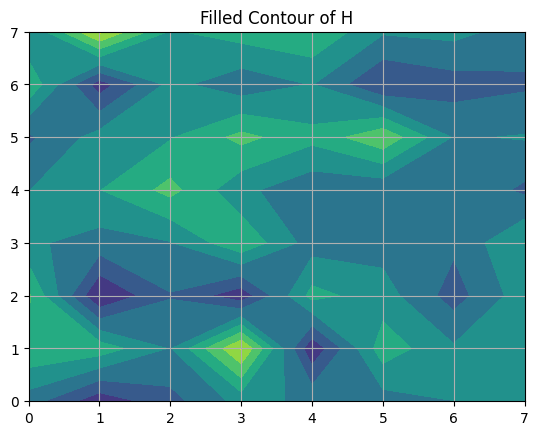

[[2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]]
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]
 [25 26 27 28 29 30 31 32]
 [33 34 35 36 37 38 39 40]
 [41 42 43 44 45 46 47 48]
 [49 50 51 52 53 54 55 56]
 [57 58 59 60 61 62 63 64]
 [65 66 67 68 69 70 71 72]]


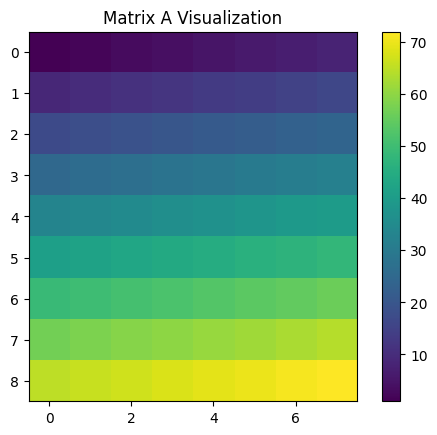

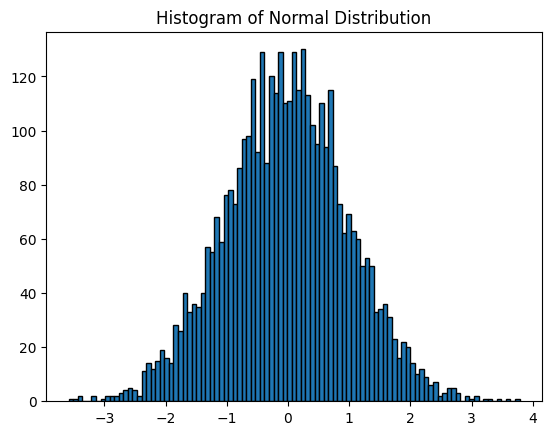

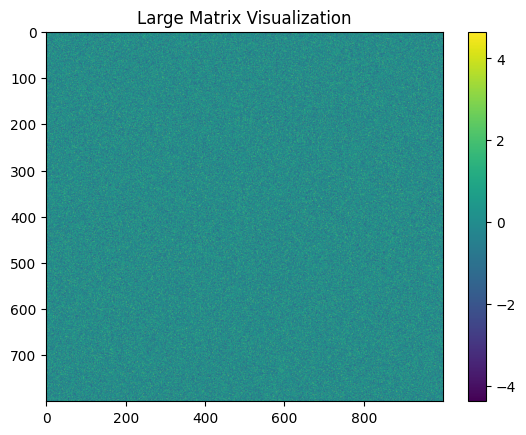

In [4]:
#Plot matrix images
H = np.random.randn(8, 8)
fig, axs = plt.subplots(1, 2)
c1 = axs[0].imshow(H, cmap='viridis')
axs[0].set_title("Matrix H")
fig.colorbar(c1, ax=axs[0])

G = np.linalg.pinv(H)  #Pseudo-inverse for generality
c2 = axs[1].imshow(G, cmap='viridis')
axs[1].set_title("Inverse of H")
fig.colorbar(c2, ax=axs[1])
plt.tight_layout()
plt.show()

#Filled contour plot
plt.figure()
plt.contourf(H, cmap='viridis')
plt.grid(True)
plt.title("Filled Contour of H")
plt.show()


m, n = 9, 8
A = np.full((m, n), 2)
print(A)

A = np.arange(1, 73).reshape((9, 8))
print(A)
plt.imshow(A, cmap='viridis')
plt.title("Matrix A Visualization")
plt.colorbar()
plt.show()


samples = np.random.randn(4000)
plt.hist(samples, bins=99, edgecolor='black')
plt.title("Histogram of Normal Distribution")
plt.show()


A = np.random.randn(800, 1000)
plt.imshow(A, cmap='viridis', aspect='auto')
plt.title("Large Matrix Visualization")
plt.colorbar()
plt.show()

Editing a matrix

[[1 2 3]
 [4 5 6]
 [7 8 9]]


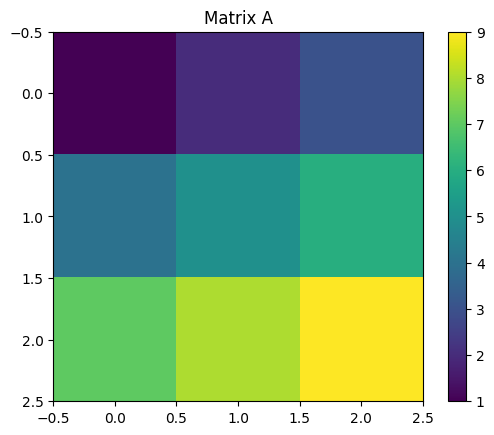

[[1 2 3]
 [4 5 6]]
[[2 3]
 [5 6]
 [8 9]]
[[2 3]
 [5 6]]
[[2 3]
 [5 6]]
[[1 2 3]
 [4 5 6]]
[[1 3]
 [2 4]
 [5 6]]
[[5 6]
 [1 3]
 [2 4]]
[[1 3]
 [5 6]
 [2 4]]
[[1 3 7]
 [2 4 8]]
[[1 3 7 1 3]
 [2 4 8 2 4]]


In [5]:
#Delete rows and/or columns
A = np.arange(1, 10).reshape((3, 3))
print(A)
plt.imshow(A, cmap='viridis')
plt.title("Matrix A")
plt.colorbar()
plt.show()

print(A[:-1, :])   #Delete 3rd row
print(A[:, 1:])    #Delete 1st column
print(A[:-1, 1:])  #Delete 3rd row and 1st column
print(A[0:2, 1:3]) #Sub-matrix
print(A[0:2, :])   #Keep all columns

#Insert a row or column to a matrix
A = np.array([[1, 3], [2, 4]])
br = np.array([5, 6])
bc = np.array([[7], [8]])

print(np.vstack((A, br)))         #Append row at bottom
print(np.vstack((br, A)))         #Prepend row at top
print(np.vstack((A[0], br, A[1]))) #Insert row in between

Abc = np.hstack((A, bc))          #Add column to matrix
print(Abc)
Abc = np.hstack((A, bc))
print(np.hstack((Abc, A)))        #Stack two matrices side by side


Row or column statistics

In [7]:
# Matrix statistics and sweeping operations
A = np.arange(1, 7).reshape((2, 3))
print(A)
print(np.sum(A, axis=1))   #row sums
print(np.mean(A, axis=1))  #row means
print(np.cumsum(A, axis=1)) #row cumsums
print(np.mean(A, axis=0))   #col means
print(np.std(A, axis=1, ddof=1))  #row SDs
print(np.std(A, axis=0, ddof=1))  #col SDs

#Sweep a matrix by a vector using subtraction
A = np.array([[1, 2, 3], [4, 5, 6]])
u = np.array([1, 2, 3])
Br = A - u  #Subtract vector from each row
print(Br)

v = np.array([1, 2])
Bc = A - v[:, np.newaxis]  #Subtract vector from each column
print(Bc)

c = np.mean(A, axis=0)
print(A - c)  #Anomaly matrix: column mean subtracted

print(np.sin(A))  #Function operation on each matrix element
print(A ** 2)     #Squaring each matrix element

#Sweep using multiplication
w = np.array([1, 2])
print(w[:, np.newaxis] * A)  #Multiply each row by vector w
print(A * w[:, np.newaxis])  #Same result

w3 = np.array([1, 2, 3])
#print((w3 * A.T).T)  #Multiply each column by vector w3
#print(w3 * A)  #Error: incompatible shapes

print(A / w[:, np.newaxis])  #Sweep by division


[[1 2 3]
 [4 5 6]]
[ 6 15]
[2. 5.]
[[ 1  3  6]
 [ 4  9 15]]
[2.5 3.5 4.5]
[1. 1.]
[2.12132034 2.12132034 2.12132034]
[[0 0 0]
 [3 3 3]]
[[0 1 2]
 [2 3 4]]
[[-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]]
[[ 0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155 ]]
[[ 1  4  9]
 [16 25 36]]
[[ 1  2  3]
 [ 8 10 12]]
[[ 1  2  3]
 [ 8 10 12]]
[[1.  2.  3. ]
 [2.  2.5 3. ]]


Conversions between a Vector and a Matrix

In [8]:
#Conversions between a Vector and a Matrix
v = np.array([60, 58, 67, 70, 55, 53])
M = v.reshape((2, 3), order='F')  #from vector to matrix
print(M)
print(M.flatten(order='F'))  #from matrix to vector by column
print(M.flatten(order='C'))  #from matrix to vector by row

#Reduce the dimension of an nD array
x = np.arange(1, 2*3*4 + 1).reshape((2, 3, 4))
print(x.shape)
print(x)  #a stack of four 2-by-3 matrices

#Flat all the other dim except the 3rd one
#Flat the 1st and 2nd dim
y = x.reshape(2*3, 4)
print(y.shape)
print(y)

#Back to the original 3D array
x_reconstructed = y.T.reshape(4, 2, 3).transpose(1, 2, 0)
print(x_reconstructed.shape)
print(x_reconstructed)


[[60 67 55]
 [58 70 53]]
[60 58 67 70 55 53]
[60 67 55 58 70 53]
(2, 3, 4)
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]
(6, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]]
(2, 3, 4)
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


Solve linear equations

In [9]:
A = np.array([[1, 1],
              [1, -1]])
b = np.array([20, 4])
x = np.linalg.solve(A, b)
print(x)  #This is the result x1=12, and x2=8

A = np.array([[1, -1],
              [2, 4]])
print(A)
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

B = np.random.randn(2, 3)
print(B)
U, s, Vh = svd(B)
print(U)
print(s)
print(Vh)

[12.  8.]
[[ 1 -1]
 [ 2  4]]
[2. 3.]
[[-0.70710678  0.4472136 ]
 [ 0.70710678 -0.89442719]]
[[ 0.32827188  0.54133517  0.34018711]
 [ 0.63980145  0.63390565 -0.18789528]]
[[-0.58330197 -0.81225539]
 [-0.81225539  0.58330197]]
[1.09445911 0.40642295]
[[-0.64978563 -0.75896407 -0.04185891]
 [ 0.26218215 -0.17209657 -0.94954899]
 [ 0.7134698  -0.62797795  0.31081271]]


Spatial covariance matrix and SVD

In [10]:
dat = np.array([[0, 2],
                [-1, 3],
                [1, 4]])
print(dat)

#Column means
col_means = np.mean(dat, axis=0)
print(col_means)

#Subtract column means
A = dat - col_means
print(A)

#Covariance matrix: (1 / number of columns) * A * A^T
covm = (1 / A.shape[1]) * A @ A.T
print(covm)

u = np.array([1, 1, 0])
v = covm @ u
print(v) #u and v are in different directions

#Eigenvectors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covm)
print(eigenvalues)
print(eigenvectors)

#Verify eigenvectors and eigenvalues
ver = (covm @ eigenvectors[:, 0]) / eigenvalues[0]
print(ver)

w = eigenvectors[:, 0]
print(w) #w is an eigenvector

[[ 0  2]
 [-1  3]
 [ 1  4]]
[0. 3.]
[[ 0. -1.]
 [-1.  0.]
 [ 1.  1.]]
[[ 0.5  0.  -0.5]
 [ 0.   0.5 -0.5]
 [-0.5 -0.5  1. ]]
[ 0.5  0.5 -1. ]
[ 1.50000000e+00  5.00000000e-01 -1.68385103e-17]
[[-4.08248290e-01 -7.07106781e-01  5.77350269e-01]
 [-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [ 8.16496581e-01  2.61022706e-16  5.77350269e-01]]
[-0.40824829 -0.40824829  0.81649658]
[-0.40824829 -0.40824829  0.81649658]


Python code for SVD

In [4]:
#Create a 2-by-3 space-time data matrix
A = np.array([[1, 2, 3],
              [-1, 0, 1]])
print(A)

#Perform SVD calculation
U, s, Vh = svd(A)
print(s)
print(U)
Vh = Vh[:-1, :] #For some reason Vh gains an extra row at the bottom
print(Vh)

#One can verify that A=UDV', where V' is transpose of V.
D = np.diag(s)
reconstructed_A = U @ D @ Vh
print(reconstructed_A)
print(np.round(reconstructed_A))

# Compute covariance matrix
covm = (1 / A.shape[1]) * A @ A.T
print(covm)

eigenvalues, eigenvectors = np.linalg.eig(covm)
print(eigenvalues)
print(eigenvectors)

print("Singular values squared divided by number of columns:", (s ** 2) / A.shape[1])
print("Eigenvalues (for comparison):", eigenvalues)

[[ 1  2  3]
 [-1  0  1]]
[3.78477943 1.29438969]
[[-0.98708746 -0.16018224]
 [-0.16018224  0.98708746]]
[[-0.21848175 -0.52160897 -0.8247362 ]
 [-0.88634026 -0.24750235  0.39133557]]
[[ 1.00000000e+00  2.00000000e+00  3.00000000e+00]
 [-1.00000000e+00  7.77552003e-17  1.00000000e+00]]
[[ 1.  2.  3.]
 [-1.  0.  1.]]
[[4.66666667 0.66666667]
 [0.66666667 0.66666667]]
[4.77485177 0.55848156]
[[ 0.98708746 -0.16018224]
 [ 0.16018224  0.98708746]]
Singular values squared divided by number of columns: [4.77485177 0.55848156]
Eigenvalues (for comparison): [4.77485177 0.55848156]


Regression examples

In [5]:
#With 3 points
x1 = np.array([1, 2, 3])
x2 = np.array([2, 1, 3])
y = np.array([-1, 2, 1])

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y}) #Put into data frame format

X = sm.add_constant(df[['x1', 'x2']])
model = sm.OLS(df['y'], X).fit()
print("Linear Regression Results:")
print(model.summary()) #Show regression results

#Verify that 3 points determining a plane
predicted_y = 1.667 * x1 - 1.333 * x2
print("Manual prediction:", predicted_y)

#Multilinear Regression
u = np.array([1, 2, 3, 1])
v = np.array([2, 4, 3, -1])
w = np.array([1, -2, 3, 4])

mydata = pd.DataFrame({'u': u, 'v': v, 'w': w})

X2 = sm.add_constant(mydata[['u', 'v']])
model2 = sm.OLS(mydata['w'], X2).fit()
print("\nMultilinear Regression Results:")
print(model2.summary()) #Show results

#Multilinear regression example for more data
np.random.seed(42)  #For reproducibility
dat = np.random.randn(10, 4)
columns = list('WXYZ')  #Corresponds to LETTERS[23:26] = W X Y Z
rows = list(string.ascii_lowercase[:10])

fdat = pd.DataFrame(dat, columns=columns, index=rows)

#Z ~ W + X + Y
X3 = sm.add_constant(fdat[['W', 'X', 'Y']])
model3 = sm.OLS(fdat['Z'], X3).fit()
print("\nRegression on Random Data:")
print(model3.summary())

Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 03 May 2025   Prob (F-statistic):                nan
Time:                        05:23:09   Log-Likelihood:                 100.75
No. Observations:                   3   AIC:                            -195.5
Df Residuals:                       0   BIC:                            -198.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.441e-16    

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 

Image analysis with SVD

<ipython-input-6-c234ca1c16c0>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  dat = img_as_float(imread(img_path))


(460, 430, 3)
[[0.51764706 0.52156863 0.52156863 0.53333333]
 [0.50588235 0.51372549 0.49019608 0.52941176]
 [0.52156863 0.52156863 0.50588235 0.53333333]]


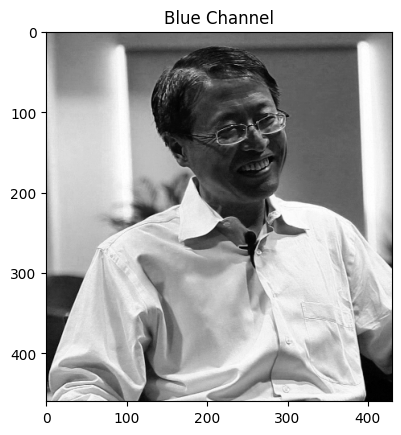

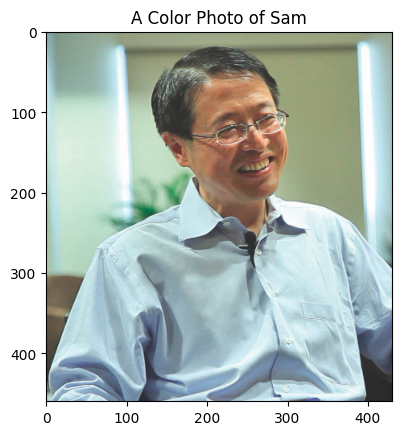

(460, 430)
[[0.6203851  0.61897843 0.61645569 0.62737216 0.62760941]
 [0.62743255 0.62405373 0.62662196 0.6321498  0.62345059]
 [0.63609412 0.63161412 0.6249098  0.62737216 0.6206451 ]]


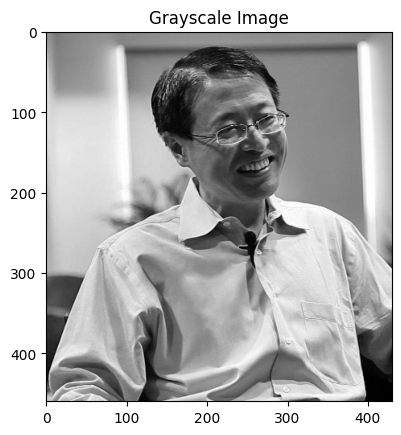

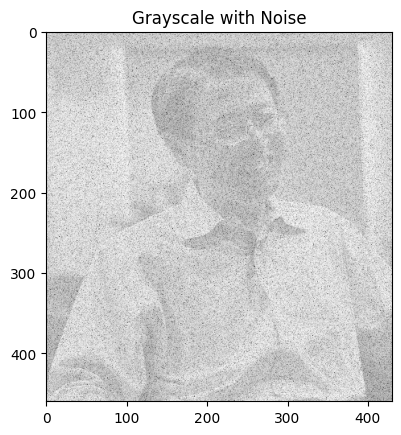

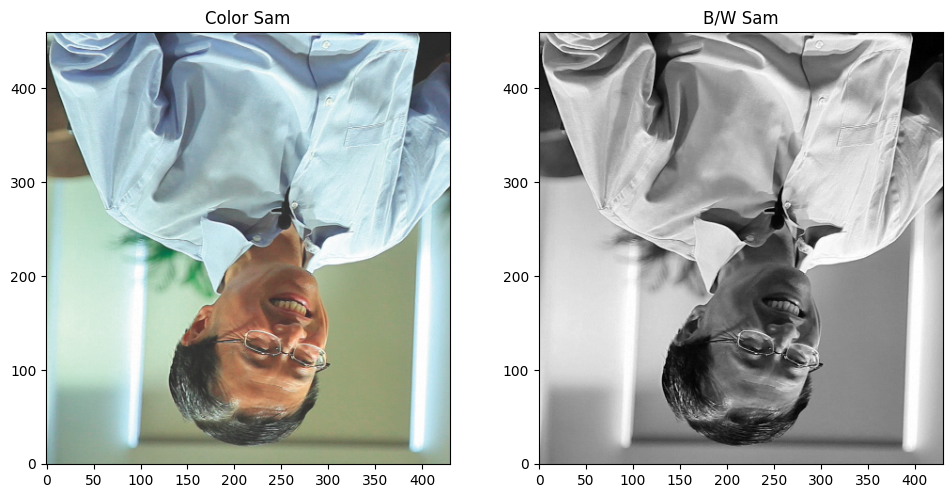

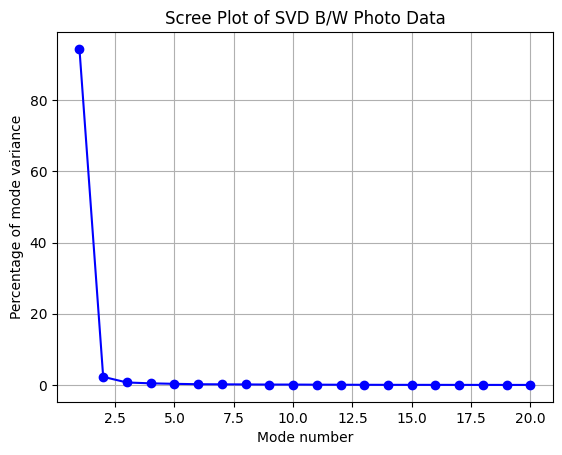

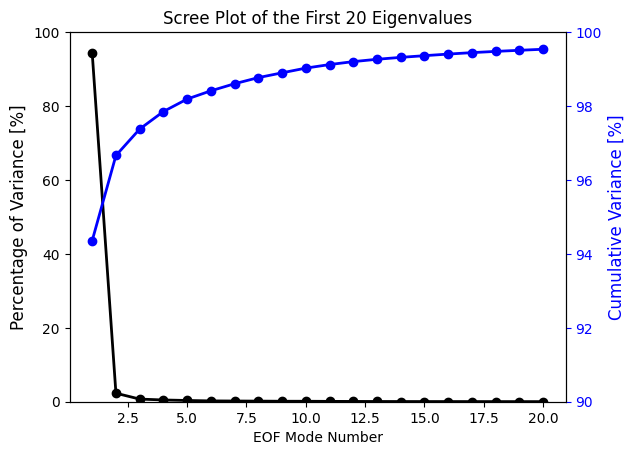

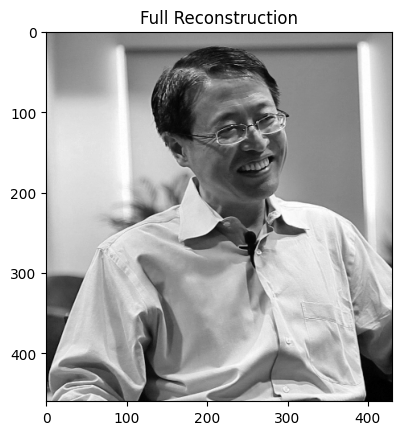

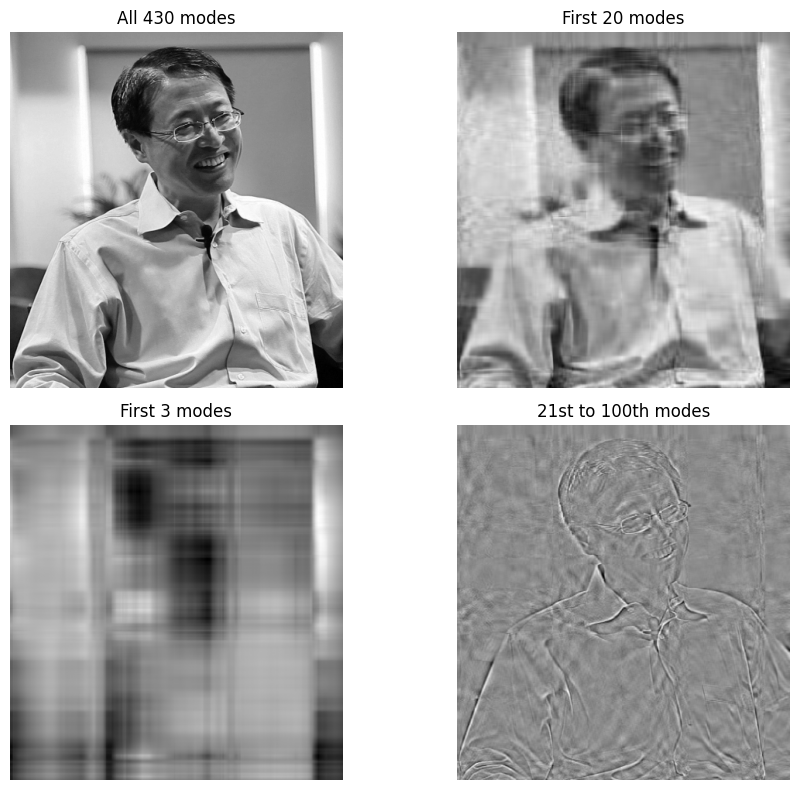

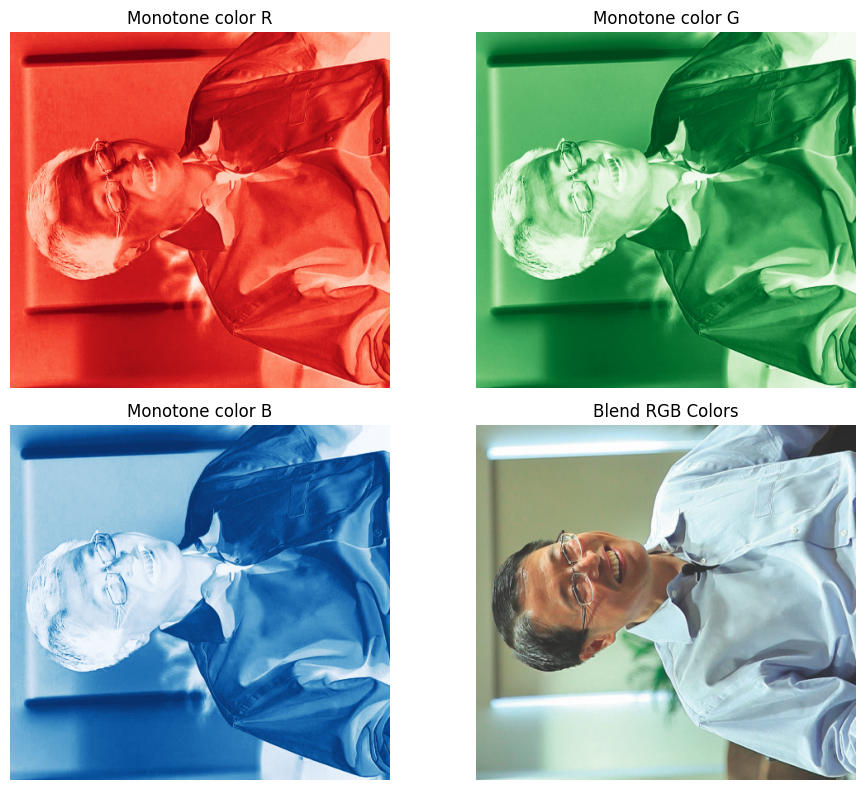

In [6]:
#Load the image, replace the file path with the one on your computer
img_path = '/content/drive/MyDrive/LinAlg/data/SamPhoto.png'
dat = img_as_float(imread(img_path))
print(dat.shape)  #Image dimensions: 430, 460, 3

#Ways to show parts of the data
print(dat[0:3, 0:4, 0])

plt.imshow(dat[:, :, 2], cmap='gray')
plt.title("Blue Channel")
plt.show()

#Plot full color image
plt.imshow(dat)
plt.title("A Color Photo of Sam")
plt.show()

#Plot in black and white
graydat = rgb2gray(dat)
print(graydat.shape)  #Dimensions: 430, 460

#Part of the gray data
print(graydat[0:3, 0:5])

#Show grayscale image
plt.imshow(graydat, cmap='gray')
plt.title("Grayscale Image")
plt.show()

#Add noise
noise = 0.1 * stats.chi2.rvs(df=5, size=graydat.shape)
graydat1 = graydat - noise
plt.imshow(graydat1, cmap='gray')
plt.title("Grayscale with Noise")
plt.show()

#Plot color and b/w photos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(dat)
axs[0].set_title('Color Sam')
axs[1].imshow(graydat, cmap='gray')
axs[1].set_title('B/W Sam')
for ax in axs:
    ax.invert_yaxis()
plt.tight_layout()
plt.show()

# SVD analysis of grayscale image
U, s, Vt = np.linalg.svd(graydat, full_matrices=False)
D = np.diag(s)
percentD = 100 * (s ** 2) / np.sum(s ** 2)
cumpercentD = np.cumsum(percentD)
modeK = np.arange(1, len(s)+1)

#Scree plot
plt.plot(modeK[:20], percentD[:20], 'o-', color='blue')
plt.xlabel('Mode number')
plt.ylabel('Percentage of mode variance')
plt.title('Scree Plot of SVD B/W Photo Data')
plt.grid(True)
plt.show()

#Scree plot with cumulative line
K = 20
lam = s**2
lamK = lam[:K]

fig, ax1 = plt.subplots()

ax1.plot(np.arange(1, K+1), 100*lamK/np.sum(lam), 'o-', color='black', linewidth=2)
ax1.set_xlabel('EOF Mode Number')
ax1.set_ylabel('Percentage of Variance [%]', fontsize=12)
ax1.set_ylim(0, 100)
ax1.set_title('Scree Plot of the First 20 Eigenvalues')

ax2 = ax1.twinx()
ax2.plot(np.arange(1, K+1), np.cumsum(100*lamK/np.sum(lam)), 'o-', color='blue', linewidth=2)
ax2.set_ylabel('Cumulative Variance [%]', color='blue', fontsize=12)
ax2.tick_params(axis='y', colors='blue')
ax2.set_ylim(90, 100)

plt.show()

#Reconstruction from all modes
recon = U @ D @ Vt
plt.imshow(recon, cmap='gray')
plt.title("Full Reconstruction")
plt.show()

#Reconstructions with different numbers of modes
def reconstruct(k):
    return U[:, :k] @ D[:k, :k] @ Vt[:k, :]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(reconstruct(430), cmap='gray')
axs[0, 0].set_title("All 430 modes")
axs[0, 1].imshow(reconstruct(20), cmap='gray')
axs[0, 1].set_title("First 20 modes")
axs[1, 0].imshow(reconstruct(3), cmap='gray')
axs[1, 0].set_title("First 3 modes")
axs[1, 1].imshow(U[:, 20:100] @ D[20:100, 20:100] @ Vt[20:100, :], cmap='gray')
axs[1, 1].set_title("21st to 100th modes")
for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()

#Monotone RGB plots
R = np.flipud(np.transpose(dat[:, :, 0]))
G = np.flipud(np.transpose(dat[:, :, 1]))
B = np.flipud(np.transpose(dat[:, :, 2]))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(R, cmap='Reds')
axs[0, 0].set_title("Monotone color R")
axs[0, 1].imshow(G, cmap='Greens')
axs[0, 1].set_title("Monotone color G")
axs[1, 0].imshow(B, cmap='Blues')
axs[1, 0].set_title("Monotone color B")

#Reconstruct image
trippy = np.stack((R, G, B), axis=-1)
axs[1, 1].imshow(trippy)
axs[1, 1].set_title("Blend RGB Colors")
for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()